In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from sklearn.metrics import auc, precision_recall_curve, roc_curve, confusion_matrix, average_precision_score
import sys
from tqdm import tqdm
import json


In [2]:
matplotlib.rcParams.update({'font.size': 25})

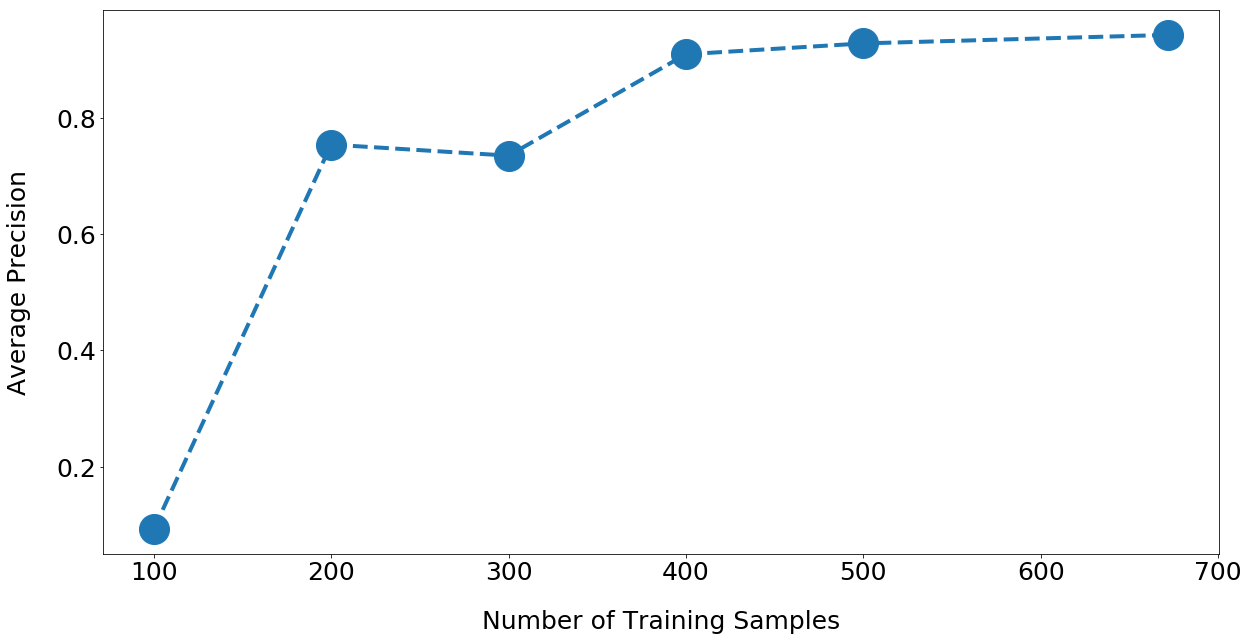

In [20]:
average_precisions = [0.0925, 0.7536, 0.7346, 0.9089, 0.9276, 0.9422]
dataset_counts = [100, 200, 300, 400, 500, 672]
fig = plt.figure(figsize=(20, 10))
plt.xlabel('Number of Training Samples', labelpad=25)
plt.ylabel('Average Precision', labelpad=25)
#plt.title('Average Testing Precision per Number\nof Training Samples\n')
plt.plot(dataset_counts, average_precisions, 'o--', markersize=30, lw=4)
plt.savefig('figures/figure_4_ap_per_training_sample.png', bbox_inches='tight')
plt.savefig('figures/figure_4_ap_per_training_sample.eps', bbox_inches='tight')


# Overlay PR Curves

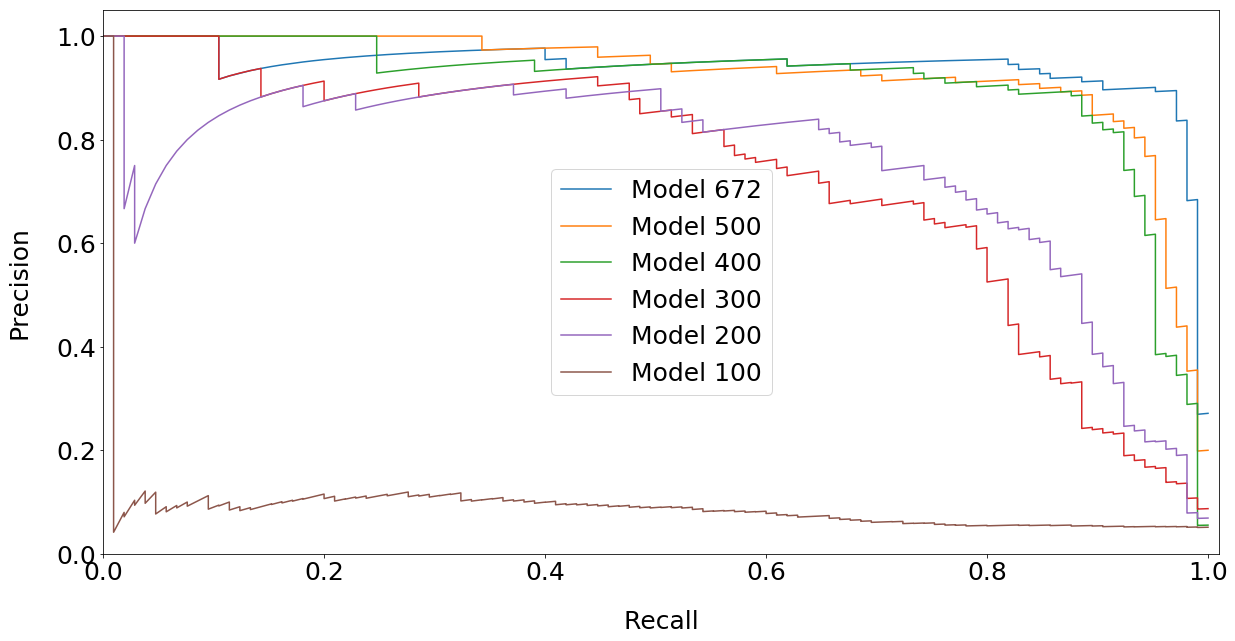

In [14]:
dataset_counts = [672, 500, 400, 300, 200, 100]

fig = plt.figure(figsize=(20, 10))
plt.xlabel('Recall', labelpad=25)
plt.ylabel('Precision', labelpad=25)
#plt.title('Precision-Recall Curves\n')

for dataset_count in dataset_counts:
    pred_filepath = os.path.join('figures', 'figure_3_dataset_{}'.format(dataset_count), 'model_predictions_{}'.format(dataset_count))
    with open(pred_filepath, 'r') as f:
        lines = [l.strip().split(',') for l in f.readlines()]
    y_true = []
    y_pred = []
    y_prob = []
    for l in lines[1:]:
        y_true.append(int(l[0]))
        y_pred.append(int(l[1]))
        y_prob.append(float(l[2]))

    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)

    average_precision = average_precision_score(y_true, y_prob)

    step_kwargs = {'step': 'post'}
    plt.plot(recall, precision, label='Model {}'.format(dataset_count))
    #plt.step(recall, precision, color='b', alpha=0.2, where='post')
    #plt.fill_between(recall, precision, alpha=0.1, **step_kwargs)

    plt.xlabel('Recall', labelpad=25)
    plt.ylabel('Precision', labelpad=25)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.01])
plt.legend()

plt.savefig('figures/figure_4_pr_curve_comparison.png', bbox_inches='tight')
plt.savefig('figures/figure_4_pr_curve_comparison.eps', bbox_inches='tight')

# Training Curves

In [46]:
dataset_counts = [672, 500, 400, 300, 200, 100]
dataset_count = dataset_counts[0]

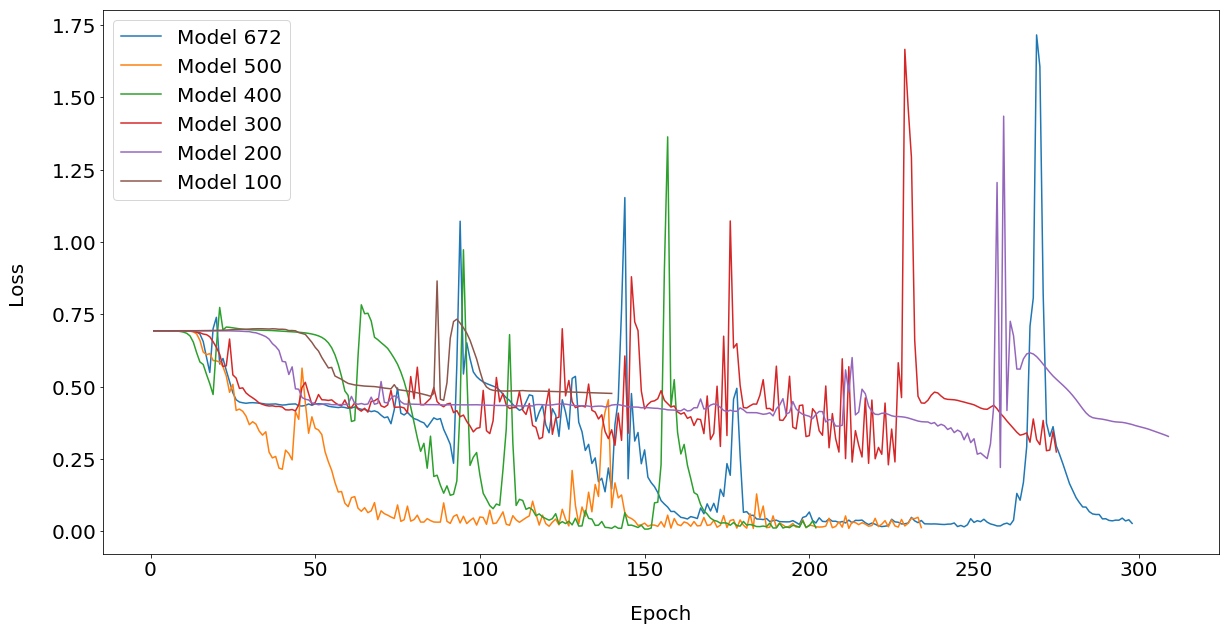

In [17]:
fig = plt.figure(figsize=(20, 10))
plt.xlabel('Epoch', labelpad=25)
plt.ylabel('Loss', labelpad=25)
#plt.title('Model Validation Losses per Epoch\n')
for dataset_count in dataset_counts:
    curve_path = os.path.join(
        os.sep, 'nfs', 'share5', 'remedis', 'projects', 'multiple_instance_learning', 'results', 'dataset_{}'.format(dataset_count), 'training_curve_fold_1.csv'
    )

    with open(curve_path, 'r') as f:
        lines = [l.strip().split(',') for l in f.readlines()]

    epochs = []
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []

    for l in lines[1:]:
        epochs.append(int(l[0]))
        train_losses.append(float(l[1]))
        train_accs.append(float(l[2]))
        val_losses.append(float(l[3]))
        val_accs.append(float(l[4]))


    #plt.plot(epochs, train_losses)
    plt.plot(epochs, val_losses, label='Model {}'.format(dataset_count))
    
    plt.legend()